### Problem formulation

1. Create a Segmentation with customers who behave the same
2. Investigate what are the common traits / behaviours in each Segment / Cluster
3. Deploy our results in Power BI for the business to use
4. Automate all this process for future data

### Importing / Installing packages

In [56]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# import sys
# !conda list Check the packages installed

### Loading the joined_tables.csv into Python

In [57]:
# Getting the file from local CSV  

# Loading the data
raw_data = pd.read_csv('joined_tables.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(200, 19)


,Customer ID,Gender,DOB,Age,Age Range,Work Activity,Income,Income Range,Marital Status,Habitation,Trans Description,Trans Amount,Trans Date,Trans Category,Bank Branch,Account Type,Account Balance,Currency,Account Balance Range
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_981fa431-...,Male,1996-10-21,25,20 - 29,parttime,15695.79,10K - 20K,Single,With Parent,ADP PMT 98930808,6278.32,2018-03-01,Income,1354,DDA,12215.43,CAD,10K-20K
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_981fa431-...,Male,1996-10-21,25,20 - 29,parttime,15695.79,10K - 20K,Single,With Parent,ADP PMT 98930808,6278.32,2018-03-01,Income,1354,SDA,6328.32,CAD,2K-10K
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_4ee15e88-...,Male,1935-04-05,86,Above 70,other,25078.90,20K - 30K,Married,With Spouse,GC 2894-TRANSFER,10031.56,2018-03-01,Transfer,658,DDA,4292.99,CAD,2K-10K
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_4ee15e88-...,Male,1935-04-05,86,Above 70,other,25078.90,20K - 30K,Married,With Spouse,GC 2894-TRANSFER,10031.56,2018-03-01,Transfer,658,SDA,10231.56,CAD,10K-20K
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_62d5c5a6-...,Male,1987-12-27,34,30 - 49,parttime,5051.31,Below 10K,Single,With Parent,NSF FEE,48.00,2018-03-31,Transfer,1864,DDA,2904.83,CAD,2K-10K


### Exploratory Data Analysis & Data Cleaning

In [58]:
# Checking for null values

raw_data.isnull().sum()

Customer ID              0
Gender                   0
DOB                      0
Age                      0
Age Range                0
Work Activity            0
Income                   0
Income Range             0
Marital Status           0
Habitation               0
Trans Description        0
Trans Amount             0
Trans Date               0
Trans Category           0
Bank Branch              0
Account Type             0
Account Balance          0
Currency                 0
Account Balance Range    0
dtype: int64

In [59]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 11:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Customer ID :85
The number of values for feature Gender :3 -- ['Female' 'Male' 'Other']
The number of values for feature DOB :83
The number of values for feature Age :48
The number of values for feature Age Range :5 -- ['20 - 29' '30 - 49' '50 - 69' 'Above 70' 'Below 20']
The number of values for feature Work Activity :3 -- ['fulltime' 'other' 'parttime']
The number of values for feature Income :66
The number of values for feature Income Range :6 -- ['10K - 20K' '20K - 30K' '30K - 40K' '40K - 70K' 'Above 70K' 'Below 10K']
The number of values for feature Marital Status :5 -- ['Divorced' 'Married' 'Separated' 'Single' 'Widowed']
The number of values for feature Habitation :4 -- ['Group' 'With Parent' 'With Spouse' 'other']
The number of values for feature Trans Description :94
The number of values for feature Trans Amount :88
The number of values for feature Trans Date :61
The number of values for feature Trans Category :9 -- ['Bills and Utilities' 'Food

In [60]:
# Getting the columns we need. Keeping only the features with less than 11 unique values

raw_data.columns

Index(['Customer ID', 'Gender', 'DOB', 'Age', 'Age Range', 'Work Activity',
       'Income', 'Income Range', 'Marital Status', 'Habitation',
       'Trans Description', 'Trans Amount', 'Trans Date', 'Trans Category',
       'Bank Branch', 'Account Type', 'Account Balance', 'Currency',
       'Account Balance Range'],
      dtype='object')

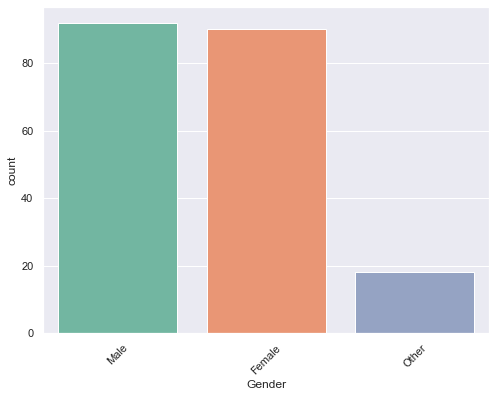

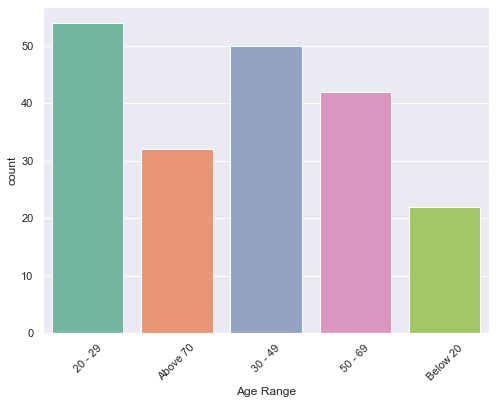

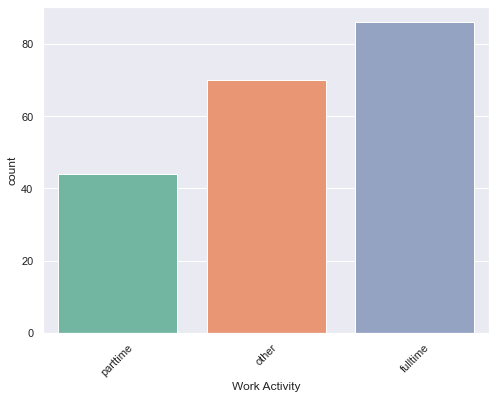

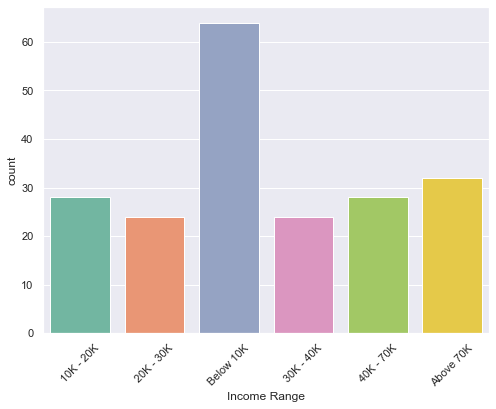

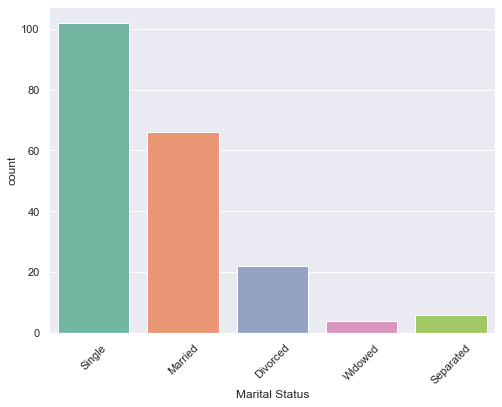

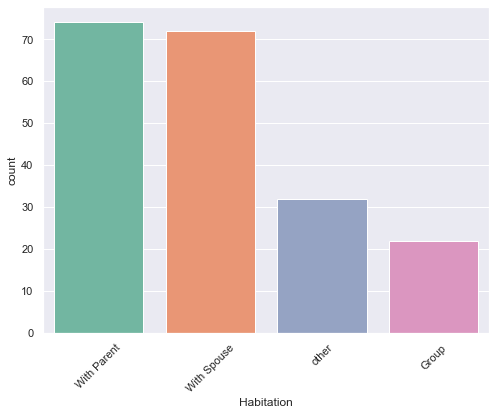

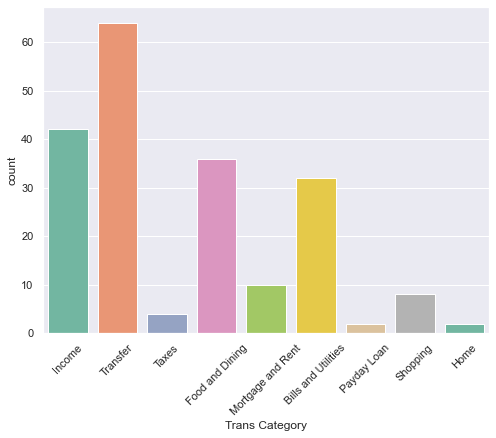

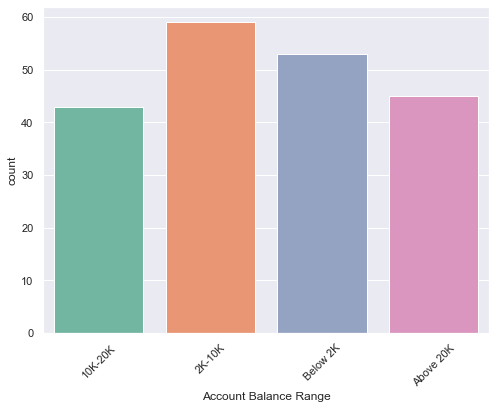

In [61]:
# Print graphs to visualize the number of customer per each feature
# Looping through all the features (with less than 11 unique values) by our y variable - see if there is relationship


features = ['Gender','Age Range', 'Work Activity','Income Range', 'Marital Status', 'Habitation','Trans Category','Account Balance Range']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set2')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()
    

### Numeric Representation

In [62]:
# Making categorical variables into numeric representation

print(raw_data.shape)

# keeping the columns we need - Drop the location columns for now, as we do not want them to impact our results (for now)
new_data = raw_data[features]
print(new_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(new_data, columns = features)



print(new_raw_data.shape)
# print the shape

new_raw_data.head()


(200, 19)
(200, 8)
(200, 39)


,Gender_Female,Gender_Male,Gender_Other,Age Range_20 - 29,Age Range_30 - 49,Age Range_50 - 69,Age Range_Above 70,Age Range_Below 20,Work Activity_fulltime,Work Activity_other,...,Trans Category_Income,Trans Category_Mortgage and Rent,Trans Category_Payday Loan,Trans Category_Shopping,Trans Category_Taxes,Trans Category_Transfer,Account Balance Range_10K-20K,Account Balance Range_2K-10K,Account Balance Range_Above 20K,Account Balance Range_Below 2K
0,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [63]:
new_data.head()

,Gender,Age Range,Work Activity,Income Range,Marital Status,Habitation,Trans Category,Account Balance Range
0,Male,20 - 29,parttime,10K - 20K,Single,With Parent,Income,10K-20K
1,Male,20 - 29,parttime,10K - 20K,Single,With Parent,Income,2K-10K
2,Male,Above 70,other,20K - 30K,Married,With Spouse,Transfer,2K-10K
3,Male,Above 70,other,20K - 30K,Married,With Spouse,Transfer,10K-20K
4,Male,30 - 49,parttime,Below 10K,Single,With Parent,Transfer,2K-10K


### K-means Clustering

In [64]:
# Running Kmeans
# k is the number of clusters

X_train = new_raw_data.values  # turn the data frame to an array

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=300) #initialize the model by selecting random number of clusters 5 and random state
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia, which evaluates how close each values are to each other. 
# The smaller number of the inertia, the better the model is.
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [0 0 4 4 0 0 3 3 0 0 4 4 4 4 0 0 4 4 2 2 4 4 1 1 1 1 2 0 2 2 2 2 3 3 0 0 3
 3 1 1 1 1 2 2 1 1 0 0 3 3 1 1 2 2 3 3 1 1 1 1 2 2 3 3 3 3 3 3 3 0 4 4 2 2
 2 2 2 2 3 3 0 0 1 1 1 1 0 0 2 2 2 2 3 3 3 3 4 4 1 1 2 2 0 0 3 3 3 3 4 4 4
 4 2 2 2 2 0 0 4 4 1 1 2 2 4 4 3 3 0 0 3 3 1 1 2 2 0 0 1 1 2 2 2 2 0 0 2 2
 1 1 2 2 3 3 2 2 1 1 1 1 0 0 2 2 4 4 1 1 1 1 4 4 2 2 2 2 4 4 4 4 4 4 2 2 0
 0 2 2 2 2 0 0 1 1 1 1 3 3 2 2]
The Inertia is:  662.3825206398348


In [65]:
kmeans.labels_.shape

(200,)

In [66]:
print(X_train) #array

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]]


In [67]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 909.7415329768261
The innertia for : 3 Clusters is: 810.8238562091502
The innertia for : 4 Clusters is: 736.04828016886
The innertia for : 5 Clusters is: 665.0900760530321
The innertia for : 6 Clusters is: 613.3279234899925
The innertia for : 7 Clusters is: 579.9513298248592
The innertia for : 8 Clusters is: 542.6781954887218
The innertia for : 9 Clusters is: 517.8687207529312
The innertia for : 10 Clusters is: 496.3894037736142
The innertia for : 11 Clusters is: 479.58176703470826
The innertia for : 12 Clusters is: 455.41582750582734
The innertia for : 13 Clusters is: 437.2134465534466
The innertia for : 14 Clusters is: 421.3698557892056
The innertia for : 15 Clusters is: 406.7981601731603
The innertia for : 16 Clusters is: 394.5955017205016
The innertia for : 17 Clusters is: 378.9496753246756
The innertia for : 18 Clusters is: 367.5224025974027
The innertia for : 19 Clusters is: 355.2753083345967


In [68]:
no_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inertia Plot per k')

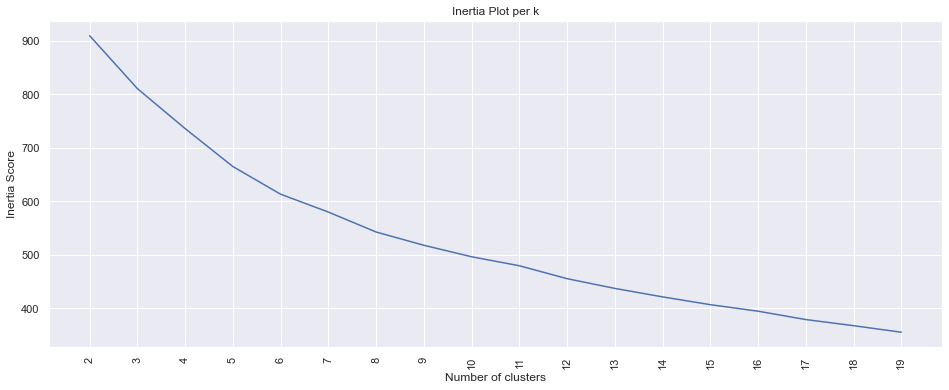

In [69]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [71]:
# From the graph we can see the slope becomes less steep at 5 clusters 
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,61,29,42,34,34


In [72]:
new_raw_data.shape

(200, 39)

### Running Principal Component Analysis (PCA) to Visualize & improve results

- What is it?

PCA is a dimensionality reduction technique that transforms a number of possibly correlated variables into a smaller number of uncorrelated variables; called principal components

The goal of PCA is to extract the most important information from the data table by compressing the size of the data set and keeping only the important information; then PCA computes new variables called principal components.

- Additional Info:

The first principal component is required to have the largest possible variance (inertia) and therefore this component will explain the largest part of the inertia / variance of the data table; hence the less principal components you have the lower the inertia will be after PCA.

For every new component you add, the inertia will increase since the rotations are always performed in a subspace and the new axes will always explain less inertia than the original components; which are computed to be optimal
Therefore, inertia should not be the criterium to choose the optimal number of principal component since the lower the components are the lower the inertia will be.
95% explained variance should be the criterium when choosing the number of principal components

Explained variance ratio (first two components): [0.233767 0.106484]


<Figure size 576x432 with 0 Axes>

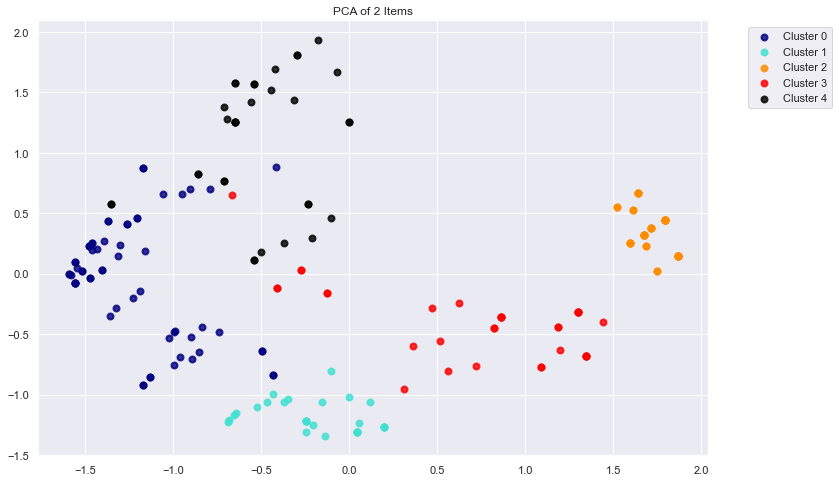

In [73]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

### Why dimensionality reduction could help k-means perform better:

Kmeans is extremely sensitive to scale, and when you have a lot of attributes there is no true scale anymore. 
This is where PCA comes in since it whitens your data.

By doing this, you will remove global correlation which can sometimes give better results. 
K-means is a "least squares" optimization problem; same with PCA.

Kmeans tries to find the least squares partition of the data while PCA finds the least squares cluster membership vector. 
The first eigenvector has the largest variance (smallest inertia), 
hence splitting on this vector (which shows the cluster membership - not input data coordinates) 
means maximization of cluster variance; better fit for Kmeans.

By maximizing between cluster variance, you minimize within-cluster variance. 
Therefore, applying PCA before clustering could potentially help you get better clusters (with more variance) in Kmeans

### Identifying the "best" number of components

Total Variance in our dataset is:  5.687336683417084
The 95% variance we want to have is:  5.4029698492462295

Variance explain with 20 n_compononets:  5.461201602129284
Variance explain with 25 n_compononets:  5.617345351836632
Variance explain with 30 n_compononets:  5.681831253578445
Variance explain with 35 n_compononets:  5.687336683417084
Variance explain with 40 n_compononets:  5.687336683417084
Variance explain with 43 n_compononets:  5.687336683417084
Variance explain with 45 n_compononets:  5.687336683417084
Variance explain with 50 n_compononets:  5.687336683417084


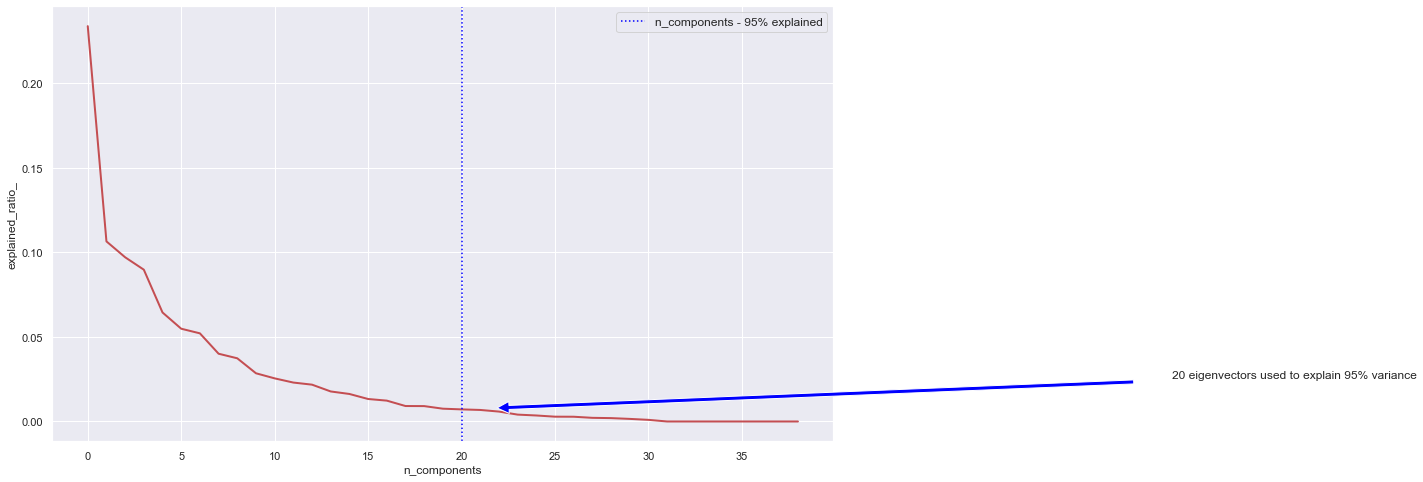

In [76]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 20 n_compononets: ", sum(a["Explained Variance"][0:20]))
print("Variance explain with 25 n_compononets: ", sum(a["Explained Variance"][0:25]))
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 43 n_compononets: ", sum(a["Explained Variance"][0:43]))
print("Variance explain with 45 n_compononets: ", sum(a["Explained Variance"][0:45]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(20,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('20 eigenvectors used to explain 95% variance', xy=(20, pca.explained_variance_ratio_[20]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()


The innertia for : 2 Clusters is: 864.8438662482046
The innertia for : 3 Clusters is: 766.2774387091487
The innertia for : 4 Clusters is: 682.6774407051277
The innertia for : 5 Clusters is: 617.3223147416056
The innertia for : 6 Clusters is: 576.8934722936448
The innertia for : 7 Clusters is: 535.1446363184549
The innertia for : 8 Clusters is: 505.6723260723215
The innertia for : 9 Clusters is: 473.1905642856999
The innertia for : 10 Clusters is: 450.922494930652
The innertia for : 11 Clusters is: 432.1998792231046
The innertia for : 12 Clusters is: 414.4212267753906
The innertia for : 13 Clusters is: 394.3343971481977
The innertia for : 14 Clusters is: 378.0306601091605
The innertia for : 15 Clusters is: 363.95531335780015
The innertia for : 16 Clusters is: 353.4696428578703
The innertia for : 17 Clusters is: 337.7055764531153
The innertia for : 18 Clusters is: 326.6107449547286
The innertia for : 19 Clusters is: 313.5726893085357


Text(0.5, 1.0, 'Inertia Plot per k')

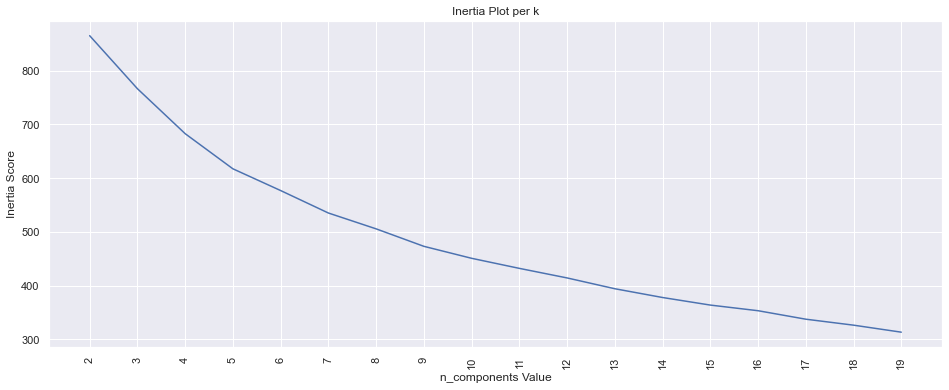

In [77]:
# Running PCA again

pca = PCA(n_components=20, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

We managed to improve the results by reducing inertia

In [78]:
# Running PCA with 36 PC
pca = PCA(n_components=20, random_state = 453)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 5 Ks
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
raw_data['Clusters'] = clusters

# Creating a cluster Category
raw_data['Clusters Category'] = 'No Data'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 0] = 'Cluster 1'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 1] = 'Cluster 2'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 2] = 'Cluster 3'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 3] = 'Cluster 4'
raw_data['Clusters Category'].loc[raw_data['Clusters'] == 4] = 'Cluster 5'


raw_data.head(5)

C:\Users\karab\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Customer ID,Gender,DOB,Age,Age Range,Work Activity,Income,Income Range,Marital Status,Habitation,...,Trans Amount,Trans Date,Trans Category,Bank Branch,Account Type,Account Balance,Currency,Account Balance Range,Clusters,Clusters Category
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_981fa431-...,Male,1996-10-21,25,20 - 29,parttime,15695.79,10K - 20K,Single,With Parent,...,6278.32,2018-03-01,Income,1354,DDA,12215.43,CAD,10K-20K,3,Cluster 4
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_981fa431-...,Male,1996-10-21,25,20 - 29,parttime,15695.79,10K - 20K,Single,With Parent,...,6278.32,2018-03-01,Income,1354,SDA,6328.32,CAD,2K-10K,3,Cluster 4
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_4ee15e88-...,Male,1935-04-05,86,Above 70,other,25078.90,20K - 30K,Married,With Spouse,...,10031.56,2018-03-01,Transfer,658,DDA,4292.99,CAD,2K-10K,4,Cluster 5
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_4ee15e88-...,Male,1935-04-05,86,Above 70,other,25078.90,20K - 30K,Married,With Spouse,...,10031.56,2018-03-01,Transfer,658,SDA,10231.56,CAD,10K-20K,4,Cluster 5
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_62d5c5a6-...,Male,1987-12-27,34,30 - 49,parttime,5051.31,Below 10K,Single,With Parent,...,48.00,2018-03-31,Transfer,1864,DDA,2904.83,CAD,2K-10K,3,Cluster 4


In [79]:
raw_data.columns

Index(['Customer ID', 'Gender', 'DOB', 'Age', 'Age Range', 'Work Activity',
       'Income', 'Income Range', 'Marital Status', 'Habitation',
       'Trans Description', 'Trans Amount', 'Trans Date', 'Trans Category',
       'Bank Branch', 'Account Type', 'Account Balance', 'Currency',
       'Account Balance Range', 'Clusters', 'Clusters Category'],
      dtype='object')

In [80]:
# Creating an order for Income

raw_data['Income Order'] = 0
raw_data['Income Order'].loc[raw_data['Income Range'] == 'Below 10K'] = 1
raw_data['Income Order'].loc[raw_data['Income Range'] == '10K - 20K'] = 2
raw_data['Income Order'].loc[raw_data['Income Range'] == '20K - 30K'] = 3
raw_data['Income Order'].loc[raw_data['Income Range'] == '30K - 40K'] = 4
raw_data['Income Order'].loc[raw_data['Income Range'] == '40K - 70K'] = 5
raw_data['Income Order'].loc[raw_data['Income Range'] == 'Above 70K'] = 6

# Creating an order for Account Balance Range
raw_data['Account Balance Range Order'] = 0
raw_data['Account Balance Range Order'].loc[raw_data['Account Balance Range'] == 'Below 2K'] = 1
raw_data['Account Balance Range Order'].loc[raw_data['Account Balance Range'] == '2K-10K'] = 2
raw_data['Account Balance Range Order'].loc[raw_data['Account Balance Range'] == '10K-20K'] = 3
raw_data['Account Balance Range Order'].loc[raw_data['Account Balance Range'] == 'Above 20K'] = 4

# Creating an order for Age Range
raw_data['Age Range Order'] = 0
raw_data['Age Range Order'].loc[raw_data['Age Range'] == 'Below 20'] = 1
raw_data['Age Range Order'].loc[raw_data['Age Range'] == '20 - 29'] = 2
raw_data['Age Range Order'].loc[raw_data['Age Range'] == '30 - 49'] = 3
raw_data['Age Range Order'].loc[raw_data['Age Range'] == '50 - 69'] = 4
raw_data['Age Range Order'].loc[raw_data['Age Range'] == 'Above 70'] = 5



C:\Users\karab\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [84]:
# Exporting the data in a CSV

raw_data.to_csv('Bank_Cluster_Output.csv', sep=',')

In [82]:
raw_data.head()

,Customer ID,Gender,DOB,Age,Age Range,Work Activity,Income,Income Range,Marital Status,Habitation,...,Bank Branch,Account Type,Account Balance,Currency,Account Balance Range,Clusters,Clusters Category,Income Order,Account Balance Range Order,Age Range Order
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_981fa431-...,Male,1996-10-21,25,20 - 29,parttime,15695.79,10K - 20K,Single,With Parent,...,1354,DDA,12215.43,CAD,10K-20K,3,Cluster 4,2,3,2
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_981fa431-...,Male,1996-10-21,25,20 - 29,parttime,15695.79,10K - 20K,Single,With Parent,...,1354,SDA,6328.32,CAD,2K-10K,3,Cluster 4,2,2,2
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_4ee15e88-...,Male,1935-04-05,86,Above 70,other,25078.90,20K - 30K,Married,With Spouse,...,658,DDA,4292.99,CAD,2K-10K,4,Cluster 5,3,2,5
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_4ee15e88-...,Male,1935-04-05,86,Above 70,other,25078.90,20K - 30K,Married,With Spouse,...,658,SDA,10231.56,CAD,10K-20K,4,Cluster 5,3,3,5
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_62d5c5a6-...,Male,1987-12-27,34,30 - 49,parttime,5051.31,Below 10K,Single,With Parent,...,1864,DDA,2904.83,CAD,2K-10K,3,Cluster 4,1,2,3
